In [41]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ipywidgets as widgets
from IPython.display import display

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

In [43]:
print("¿Qué empresa desea analizar?")
print("1. Apple")
print("2. Microsoft")
print("3. Amazon")
print("4. Google")
print("5. Facebook")
print("6. Tesla")
print("7. Nvidia")

indicator = int(input())

if indicator == 1:
    company = 'AAPL'
elif indicator == 2:
    company = 'MSFT'
elif indicator == 3:
    company = 'AMZN'
elif indicator == 4:
    company = 'GOOG'
elif indicator == 5:
    company = 'FB'
elif indicator == 6:
    company = 'TSLA'
elif indicator == 7: 
    company = 'NVDA'
else:
    print("Opción no válida")
    exit()

¿Qué empresa desea analizar?
1. Apple
2. Microsoft
3. Amazon
4. Google
5. Facebook
6. Tesla
7. Nvidia


In [44]:
#cargar datos
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,16.222704,16.600606,16.208540,16.532528,147611217,0.0,0.0
2012-01-04 00:00:00-05:00,16.523088,16.652782,16.413519,16.603836,114989399,0.0,0.0
2012-01-05 00:00:00-05:00,16.451035,16.496751,16.304445,16.373516,131808205,0.0,0.0
2012-01-06 00:00:00-05:00,16.376995,16.398115,16.144440,16.150156,108119746,0.0,0.0
2012-01-09 00:00:00-05:00,16.062697,16.075122,15.434848,15.465409,233776981,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,67.259832,67.347614,66.974529,67.013435,6950000,0.0,0.0
2019-12-26 00:00:00-05:00,67.143612,67.899606,67.058821,67.853363,13350000,0.0,0.0
2019-12-27 00:00:00-05:00,67.982542,68.059357,67.300220,67.428902,20768000,0.0,0.0


In [45]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [46]:
#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25


C:\Users\HONOR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0395
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0028
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0020
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0022
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0016
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0017
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0015
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0014
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0017
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0013
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0014
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0013
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0016
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0013
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0012
Epoch 16/25
61/

In [47]:
#Cargar los datos del test
hist_test = ticker.history(start = '2018-1-1', end='2022-1-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [48]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


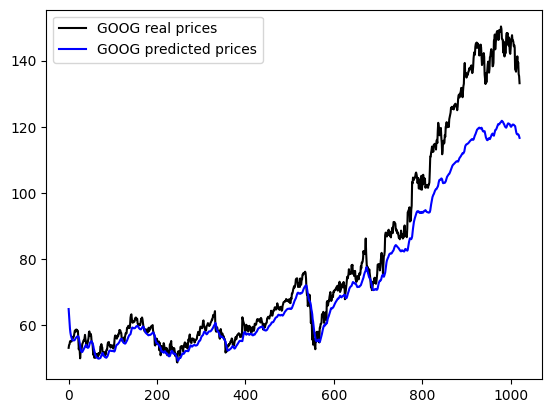

In [49]:
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

In [50]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

46.40432932457856 %
